In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests 

In [2]:
from config import weather_api_key

In [3]:
# Basic URL for openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=756f9522a4b005a9bb257a1418a87a16


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | shingu
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | podgorica
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | beringovskiy
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | akhtanizovskaya
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | marcona
City not found. Skipping...
Processing Record 18 of Set 1 | nichinan
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | bathsheba
Processing Record 22 of Set 1 | caconda
Processing Record 23 of Set 1 | rikitea
Processing Record 24 of Set 1 | richard

Processing Record 39 of Set 4 | moose factory
Processing Record 40 of Set 4 | lenger
Processing Record 41 of Set 4 | bartica
Processing Record 42 of Set 4 | toropets
Processing Record 43 of Set 4 | mae sai
Processing Record 44 of Set 4 | northam
Processing Record 45 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 46 of Set 4 | belaya gora
Processing Record 47 of Set 4 | tucuman
Processing Record 48 of Set 4 | avera
Processing Record 49 of Set 4 | tuatapere
Processing Record 50 of Set 4 | acarau
Processing Record 1 of Set 5 | mount pleasant
Processing Record 2 of Set 5 | rojhan
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | mehamn
Processing Record 5 of Set 5 | birao
Processing Record 6 of Set 5 | elk
Processing Record 7 of Set 5 | nshamba
Processing Record 8 of Set 5 | mount isa
Processing Record 9 of Set 5 | keflavik
Processing Record 10 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 11 of Set 5 | gangotri
Ci

Processing Record 31 of Set 8 | alexandria
Processing Record 32 of Set 8 | kaeng khoi
Processing Record 33 of Set 8 | yudong
Processing Record 34 of Set 8 | bongandanga
Processing Record 35 of Set 8 | hasaki
Processing Record 36 of Set 8 | newport
Processing Record 37 of Set 8 | bay saint louis
Processing Record 38 of Set 8 | ukiah
Processing Record 39 of Set 8 | peniche
Processing Record 40 of Set 8 | kutahya
Processing Record 41 of Set 8 | luba
Processing Record 42 of Set 8 | tabou
Processing Record 43 of Set 8 | kununurra
Processing Record 44 of Set 8 | ishikari
Processing Record 45 of Set 8 | kharp
Processing Record 46 of Set 8 | sabha
Processing Record 47 of Set 8 | pangnirtung
Processing Record 48 of Set 8 | pauini
Processing Record 49 of Set 8 | gobo
Processing Record 50 of Set 8 | along
Processing Record 1 of Set 9 | armidale
Processing Record 2 of Set 9 | vestmannaeyjar
Processing Record 3 of Set 9 | makakilo city
Processing Record 4 of Set 9 | erzin
Processing Record 5 of Set

Processing Record 19 of Set 12 | srivardhan
Processing Record 20 of Set 12 | benguela
Processing Record 21 of Set 12 | leshukonskoye
Processing Record 22 of Set 12 | san policarpo
Processing Record 23 of Set 12 | solnechnyy
Processing Record 24 of Set 12 | fort nelson
Processing Record 25 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 26 of Set 12 | skelleftea
Processing Record 27 of Set 12 | erenhot
Processing Record 28 of Set 12 | atar
Processing Record 29 of Set 12 | sulangan
Processing Record 30 of Set 12 | piura
Processing Record 31 of Set 12 | kangaba
Processing Record 32 of Set 12 | tres arroyos
Processing Record 33 of Set 12 | lolodorf
Processing Record 34 of Set 12 | biswan
Processing Record 35 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 36 of Set 12 | nguiu
City not found. Skipping...
Processing Record 37 of Set 12 | ishigaki
Processing Record 38 of Set 12 | aklavik
Processing Record 39 of Set 12 | svetlogorsk
Processing Record 40 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,73.40,64,90,6.91,US,2021-02-06 04:47:24
1,Hithadhoo,-0.6000,73.0833,82.47,77,98,16.51,MV,2021-02-06 04:50:07
2,Shingu,33.7333,135.9833,57.20,47,40,5.75,JP,2021-02-06 04:51:32
3,Thompson,55.7435,-97.8558,-23.80,69,40,13.80,CA,2021-02-06 04:49:51
4,Kapaa,22.0752,-159.3190,69.80,60,75,5.75,US,2021-02-06 04:47:53
5,Hermanus,-34.4187,19.2345,63.00,92,1,1.01,ZA,2021-02-06 04:49:40
6,Podgorica,42.4411,19.2636,46.40,87,40,5.75,ME,2021-02-06 04:51:33
7,Chuy,-33.6971,-53.4616,58.42,91,8,5.88,UY,2021-02-06 04:51:33
8,Cape Town,-33.9258,18.4232,68.00,88,0,9.22,ZA,2021-02-06 04:51:14
9,Beringovskiy,63.0500,179.3167,-10.73,87,46,6.51,RU,2021-02-06 04:51:33


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-02-06 04:47:24,19.7297,-155.0900,73.40,64,90,6.91
1,Hithadhoo,MV,2021-02-06 04:50:07,-0.6000,73.0833,82.47,77,98,16.51
2,Shingu,JP,2021-02-06 04:51:32,33.7333,135.9833,57.20,47,40,5.75
3,Thompson,CA,2021-02-06 04:49:51,55.7435,-97.8558,-23.80,69,40,13.80
4,Kapaa,US,2021-02-06 04:47:53,22.0752,-159.3190,69.80,60,75,5.75
5,Hermanus,ZA,2021-02-06 04:49:40,-34.4187,19.2345,63.00,92,1,1.01
6,Podgorica,ME,2021-02-06 04:51:33,42.4411,19.2636,46.40,87,40,5.75
7,Chuy,UY,2021-02-06 04:51:33,-33.6971,-53.4616,58.42,91,8,5.88
8,Cape Town,ZA,2021-02-06 04:51:14,-33.9258,18.4232,68.00,88,0,9.22
9,Beringovskiy,RU,2021-02-06 04:51:33,63.0500,179.3167,-10.73,87,46,6.51


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

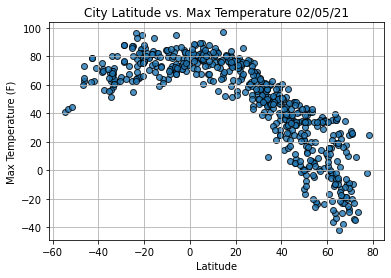

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

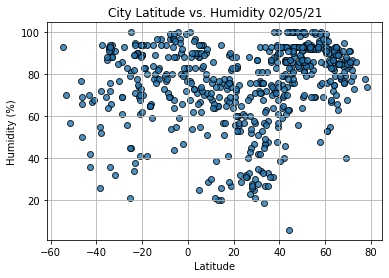

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

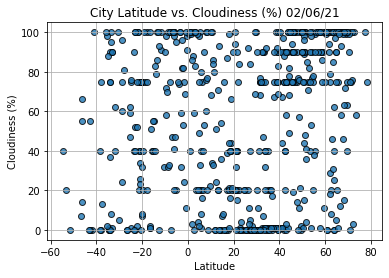

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

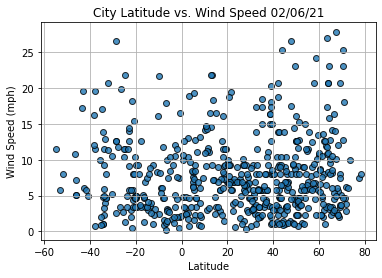

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()